In [ ]:
!pip uninstall -y numpy

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2


In [ ]:
!pip install --no-cache-dir numpy==1.26.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 157.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 172.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.3 which is incompatible.


In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
import numpy as np
print(np.__version__) #Verify if its the correct version

1.26.3


In [ ]:
!pip install numpy==1.26.3
!pip install keras
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn
!pip install tensorflow
!pip install prettytable
!pip install albumentations
!pip install dlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import albumentations as A
# Data Augmentation
augment = A.Compose([
    A.RandomBrightnessContrast(p=0.5),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.5), # This line already uses GaussNoise, it's fine.
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=10, p=0.7),
    A.MotionBlur(blur_limit=3, p=0.3),
    A.GaussNoise(p=0.3)
])

<ipython-input-3-83bbdf6a6971>:5: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=0.5), # This line already uses GaussNoise, it's fine.
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf

# Path to dataset
DIR_PATH = "/content/drive/MyDrive/hindi_dataset"

# Video properties
TOTAL_FRAMES = 30          # Extract 30 frames per video
HEIGHT, WIDTH = 80, 112    # Frame dimensions
CHANNELS = 1                # Grayscale

# Data storage
videos, labels = [], []
counter = 0

### 🛠️ Function to Extract Frames from Video
def extract_frames(video_path, total_frames=TOTAL_FRAMES):
    """Extract frames from video and pad to total_frames if necessary."""
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"❌ Failed to open {video_path}")
        return np.zeros((total_frames, HEIGHT, WIDTH, CHANNELS), dtype=np.float32)

    frames = []

    while len(frames) < total_frames:
        ret, frame = cap.read()
        if not ret:
            break

        # Resize and convert to grayscale
        frame_resized = cv2.resize(frame, (WIDTH, HEIGHT))
        frame_gray = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)
        frame_gray = frame_gray[..., np.newaxis]  # Add channel dimension
        frames.append(frame_gray)

    cap.release()

    # Handle insufficient frames by padding with the last frame
    if len(frames) < total_frames:
        print(f"⚠️ {len(frames)} frames extracted, padding with last frame.")
        if frames:
            while len(frames) < total_frames:
                frames.append(frames[-1])
        else:
            # If no frames are extracted, create black frames
            black_frame = np.zeros((HEIGHT, WIDTH, CHANNELS), dtype=np.uint8)
            frames = [black_frame] * total_frames

    # Convert frames to numpy array and normalize
    frames_array = np.array(frames, dtype=np.float32) / 255.0
    return frames_array

### 🚀 Iterating Through All Videos in the Dataset
for root, _, files in os.walk(DIR_PATH):
    for file in files:
        if file.endswith(".mp4"):
            # Extract label from folder name
            label = root.split("/")[-1].split("_")[0]
            video_path = os.path.join(root, file)

            counter += 1
            print(f"{counter}: Processing {file} with label '{label}'")

            try:
                # Extract frames
                frames = extract_frames(video_path)

                # Store the frames and label
                videos.append(frames)
                labels.append(label)

            except Exception as e:
                print(f"❌ Error processing {file}: {e}")
                continue

            # Generate multiple augmentations per video to increase dataset size
            for _ in range(19):  # Augment each video 5 times
                stacked_video = np.hstack(frames)
                stacked_video = (stacked_video * 255).astype(np.uint8)
                try:
                    augmented_stacked = augment(image=stacked_video)['image']
                    augmented_frames = np.array(np.hsplit(augmented_stacked, TOTAL_FRAMES))
                    augmented_frames = augmented_frames.astype(np.float32) / 255.0
                    augmented_frames = augmented_frames.reshape(TOTAL_FRAMES, HEIGHT, WIDTH, CHANNELS)
                    videos.append(augmented_frames)
                    labels.append(label)
                except Exception as e:
                    print(f"Augmentation failed for {file}: {e}")


print(f"✅ Total videos processed: {len(videos)}")


In [ ]:
videos = np.array(videos)
labels = np.array(labels)


In [ ]:
videos.shape

(4000, 30, 80, 112, 1)

In [ ]:
labels.shape

(4000,)

In [ ]:
save_path_videos = '/content/drive/MyDrive/paths/hindi_dataset_Videos.npy'
save_path_labels = '/content/drive/MyDrive/paths/hindi_dataset_labels.npy'

In [ ]:
np.save(save_path_videos, videos)
np.save(save_path_labels, labels)

In [ ]:
import numpy as np

videos = np.load(save_path_videos)
labels = np.load(save_path_labels)

In [ ]:
# Print the shape of the videos and labels arrays
print("Videos shape:", videos.shape) # output should be (no of videos, 50, 80, 112, 3)
print("Labels shape:", labels.shape)

Videos shape: (4000, 30, 80, 112, 1)
Labels shape: (4000,)


In [ ]:
print("\nFirst 10 label array values:\n", labels[:10])



First 10 label array values:
 ['हाथी' 'हाथी' 'हाथी' 'हाथी' 'हाथी' 'हाथी' 'हाथी' 'हाथी' 'हाथी' 'हाथी']


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode the labels into numerical values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# One-hot encode the labels
labels_onehot = to_categorical(labels_encoded)

# Display the mapping
print("✅ Label encoding mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{i} → {label}")

print("✅ Labels encoded and one-hot encoded.")


✅ Label encoding mapping:
0 → आम
1 → किताब
2 → खाना
3 → चाँद
4 → दोस्त
5 → पानी
6 → माँ
7 → सड़क
8 → सूरज
9 → हाथी
✅ Labels encoded and one-hot encoded.


In [ ]:
label_dict = {0:"आम", 1: "किताब", 2:"खाना", 3:"चाँद", 4:"दोस्त", 5:"पानी", 6: "माँ", 7:"सड़क", 8:"सूरज", 9:"हाथी"}

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv3D, MaxPooling3D, GlobalAveragePooling3D,
    Dense, LSTM, TimeDistributed, Bidirectional, Dropout,
    BatchNormalization, Activation, Reshape
)

model = Sequential()

# --- 3D CNN Block 1 ---
model.add(Conv3D(64, kernel_size=(3, 3, 3), padding='same', input_shape=(22, 80, 112, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

# --- 3D CNN Block 2 ---
model.add(Conv3D(128, kernel_size=(3, 3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

# --- 3D CNN Block 3 (New Layer) ---
model.add(Conv3D(256, kernel_size=(3, 3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

# --- Global Spatial Feature Extraction ---
model.add(GlobalAveragePooling3D())  # Replaces Flatten + TimeDistributed

# --- Fully Connected Layers ---
model.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(Dropout(0.3))

# --- BiLSTM Layers ---
model.add(Reshape((1, 128)))  # Reshape to make input (batch, time, features)
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)))
model.add(Bidirectional(LSTM(64, return_sequences=False, dropout=0.3, recurrent_dropout=0.3)))

# --- Final Output ---
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10))  # Raw logits
model.add(Activation('softmax'))

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 22, 80, 112,    │         1,792 │
│                                 │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 22, 80, 112,    │           256 │
│ (BatchNormalization)            │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 22, 80, 112,    │             0 │
│                                 │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 11, 40, 56, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 11, 40, 56,     │       221,312 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 40, 56,     │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 40, 56,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 5, 20, 28, 128) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_2 (Conv3D)               │ (None, 5, 20, 28, 256) │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5, 20, 28, 256) │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 5, 20, 28, 256) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_2 (MaxPooling3D)  │ (None, 2, 10, 14, 256) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling3d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling3D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 1, 256)         │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,25

 Total params: 1,645,002 (6.28 MB)

 Trainable params: 1,644,106 (6.27 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    videos, labels_onehot, test_size=0.2, random_state=42, stratify=labels_encoded
)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")


Training set: (3200, 30, 80, 112, 1), (3200, 10)
Validation set: (800, 30, 80, 112, 1), (800, 10)


In [ ]:
import gc
gc.collect()
!cat /proc/meminfo | grep Mem


MemTotal:       13289424 kB
MemFree:          144428 kB
MemAvailable:    2856192 kB


In [ ]:
del videos, labels, labels_onehot, labels_encoded

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint # Importing necessary callbacks

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True,
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    min_lr=1e-6,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    'best_video_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=16,  # If memory allows, increased batch size
    epochs=80,
    callbacks=[early_stopping, lr_scheduler, model_checkpoint],
    shuffle=True
)


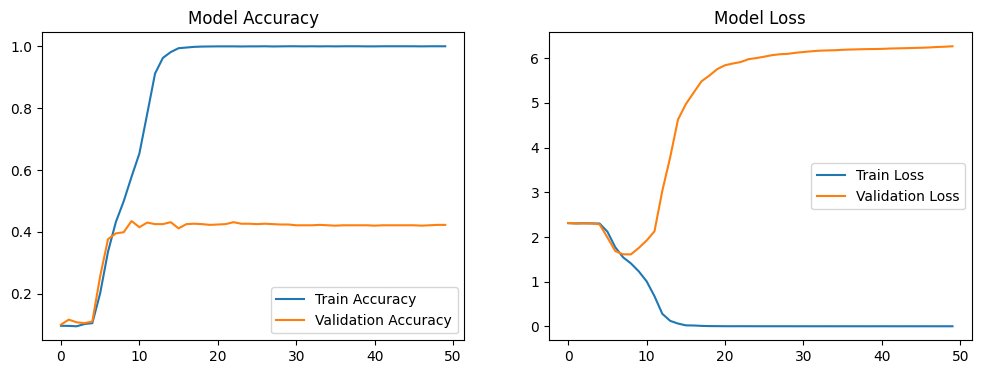

In [ ]:
import matplotlib.pyplot as plt
# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Model Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Model Loss')
    plt.show()

plot_training_history(history)


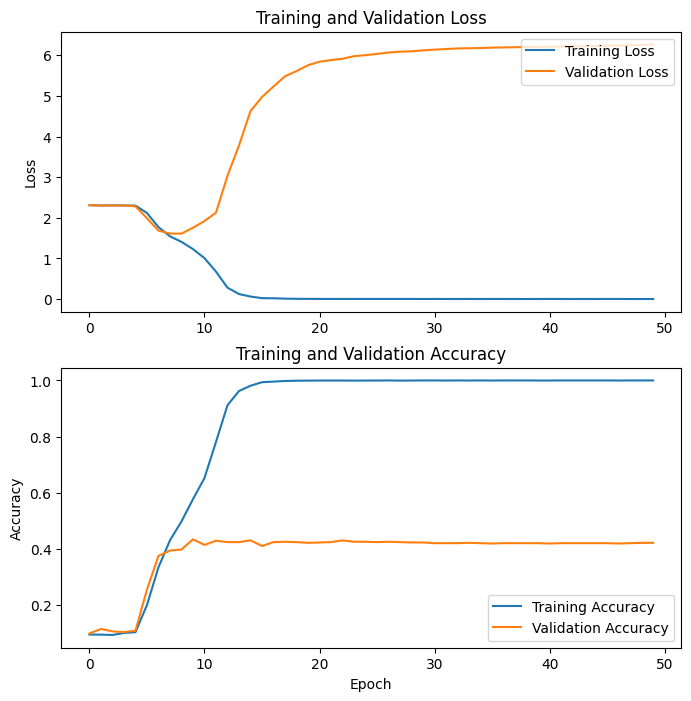

In [ ]:
# Plot the training and validation loss and accuracy
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].legend(loc='upper right')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training and Validation Loss')

axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].legend(loc='lower right')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training and Validation Accuracy')

plt.xlabel('Epoch')
plt.show()

In [ ]:
# prompt: load saved model
import tensorflow as tf

model_path = '/content/drive/MyDrive/models/3dcnn+BiLstm(Hindi).h5' #@param {type:"string"}
model = tf.keras.models.load_model(model_path)


In [ ]:
# Evaluate the model
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 257ms/step - accuracy: 0.4211 - loss: 6.2918
Validation Accuracy: 42.25%


In [ ]:
y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 258ms/step


In [ ]:
from prettytable import PrettyTable
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical

# Convert y_pred to one-hot encoded format to match y_val
y_pred_onehot = to_categorical(y_pred, num_classes=y_val.shape[1])

# Generate classification report
report = classification_report(y_val, y_pred_onehot, output_dict=True)

table = PrettyTable()
table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]
for label, metrics in report.items():
    if label.isdigit():
        precision = round(metrics['precision'], 2)
        recall = round(metrics['recall'], 2)
        f1_score = round(metrics['f1-score'], 2)
        support = metrics['support']
        table.add_row([label_dict[int(label)], precision, recall, f1_score, support])

print(table)

+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|   आम  |    0.41   |  0.54  |   0.47   |   80.0  |
|  किताब  |    0.43   |  0.4   |   0.42   |   80.0  |
|   खाना  |    0.37   |  0.41  |   0.39   |   80.0  |
|   चाँद  |    0.52   |  0.35  |   0.42   |   80.0  |
|  दोस्त  |    0.37   |  0.35  |   0.36   |   80.0  |
|   पानी  |    0.49   |  0.41  |   0.45   |   80.0  |
|   माँ   |    0.46   |  0.44  |   0.45   |   80.0  |
|  सड़क  |    0.37   |  0.38  |   0.37   |   80.0  |
|  सूरज  |    0.44   |  0.45  |   0.45   |   80.0  |
|   हाथी  |    0.41   |  0.5   |   0.45   |   80.0  |
+-------+-----------+--------+----------+---------+


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2310 (\N{DEVANAGARI LETTER AA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib

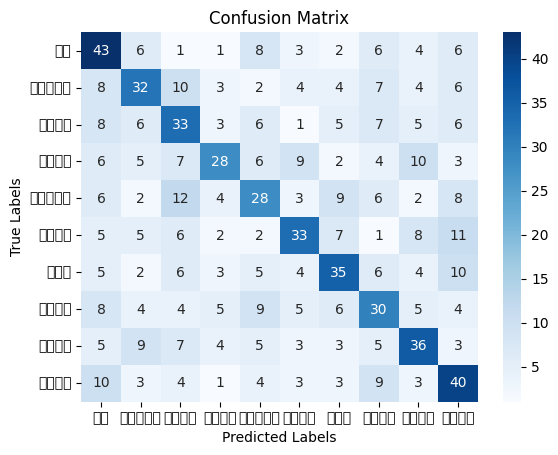

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Convert y_val to multiclass format
y_val_multiclass = np.argmax(y_val, axis=1)  # Convert one-hot to class indices

# Now generate the confusion matrix
conf_matrix = sklearn.metrics.confusion_matrix(y_val_multiclass, y_pred)

# Define the list of label strings in the order of their integer values
label_strings = [label_dict[i] for i in range(len(label_dict))]

# Generate the heatmap confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=label_strings, yticklabels=label_strings)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Save the trained model
model.save("/content/drive/MyDrive/models/3dcnn+BiLstm(Hindi).h5")
print("✅ Model saved.")
